### The Sparks Foundation
### Task 3 - Prediction Using Decision Tree Algorithm
### Pratyush Yadav

#### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn import tree                           #This will be helpful in plotting the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier #Will be helpful for plotting the ROC curves and the corresponding AUC values
from sklearn.metrics import confusion_matrix       #To check the confusion matrix
from sklearn.metrics import classification_report  #Get the respective classification metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_csv('C:/Users/Pratyush Yadav/Downloads/Iris.csv')

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here, we can see that there is an additional column "Id" which doesn't provide any useful information to us and since it has high cardinality as well, we can either discard it from our dataset, or we can remove it while modelling.  

In [4]:
#Splitting the dataset
x = iris_data.drop(['Id','Species'],axis=1)
y = iris_data['Species']
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state=20)

Here, for the decision tree, we have a few parameters like max_depth and min_sample_split which help to curb the problem of overfitting. Either of these parameters can be used to control the size of the tree. In this case, I have chosen the min_samples_split parameter where the tree will not split further if the node contains less than "min_samples_split" datapoints.

In [5]:
dtree_model = DecisionTreeClassifier(min_samples_split=5, random_state=10) 

dtree_model.fit(x_train, y_train)

y_pred_dtree = dtree_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred_dtree)

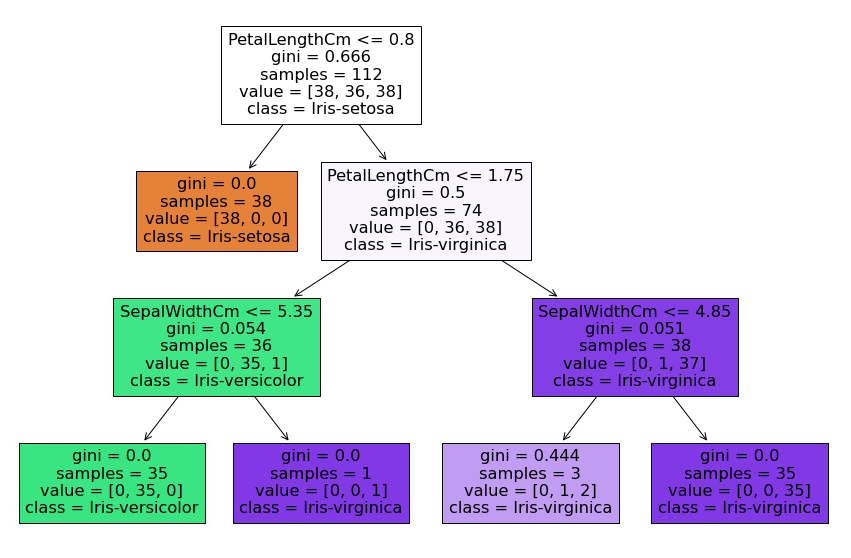

In [6]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dtree_model, 
                   feature_names=iris_data.columns,  
                   class_names=iris_data['Species'].unique().tolist(),
                   filled=True)

Here, as you can see, there is a leaf node containing 3 samples which is not further split based on the parameter specified in the initialization of the model. We now visualize the confusion matrix and get the metrics for our classifier. 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.82      1.00      0.90        14
 Iris-virginica       1.00      0.75      0.86        12

       accuracy                           0.92        38
      macro avg       0.94      0.92      0.92        38
   weighted avg       0.93      0.92      0.92        38



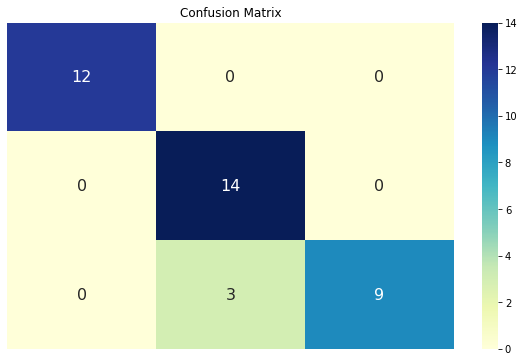

In [7]:
plt.figure(figsize = (10,6))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g',annot_kws={"fontsize":16})
plt.axis('off')
plt.title('Confusion Matrix')

print(classification_report(y_test, y_pred_dtree))

The metrics and the confusion matrix show that our classifier performs well with an overall accuracy of 92%. Since this is not a binary classification problem, precision, recall and other metrics will be computed for each class. Accordingly we have 3 sets of precision, recall and f1 values in our classification report.

#### ROC - Curves for each class using One-vs-Rest 

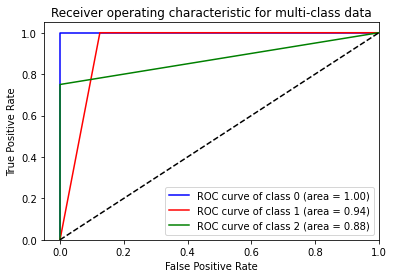

In [8]:
y = label_binarize(y, classes=['Iris-setosa','Iris-versicolor','Iris-virginica'])
n_classes = y.shape[1]

x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state=20)

classifier = OneVsRestClassifier(dtree_model)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [9]:
roc_auc #AUC scores for each class

{0: 1.0, 1: 0.9375, 2: 0.875}

We can see that the AUC values for each class is in a pretty good shape, indicating the classifier is able to perform well on the test dataset. Next step is to predict the class of a new data point when fed into the classifier